# Upper Confidence Bound (UCB)

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [8]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


So, we have a list of ads in the columns, and each row corresponds to a round of clicking, and the Ads with 1 as an entry signify that these ads were clicked in that round.    
We are to find an ad that works the best.

## Implementing UCB

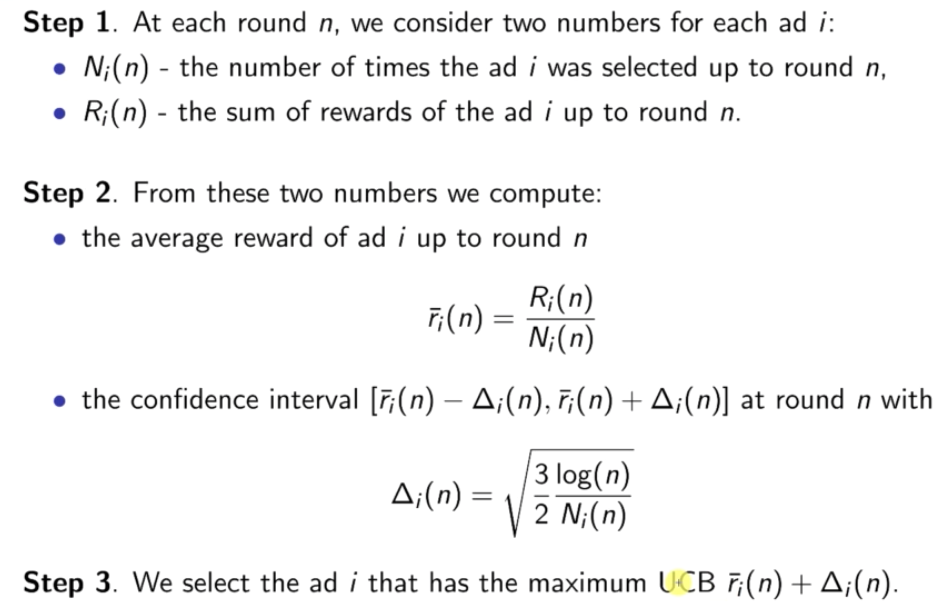

In [9]:
import math #for sqrt later in step 2
N = 10000 #total no. of rounds of ads to users, 10k rounds showing ads to 10k users
d = 10 #total no. of ads
ads_selected = [] 
numbers_of_selections = [0] * d         #no. of times i'th ad was selected, is a list of 10 '0s'
sums_of_rewards = [0] * d               #reward accumulated for each ad
total_reward = 0                        #sum of all rewards of all ads
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):                  #looping all ads
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) #+/- range of CI
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400                #super high value to give an unselected ad, highest UCB
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound      #update the max_UCB
      ad = i
  ads_selected.append(ad)                #start adding the ad to the initiated list.
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #no. of times that ad is selected till this round N
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward #the core of reinforcement learning, using rewards to prioritize/penalize
  total_reward = total_reward + reward

## Visualising the results

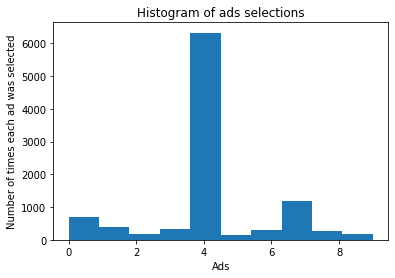

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Well, pretty evident that the 4th ad has immensely high reward and was clicked for the maximum times of the 10k users. So, it must be selected for the actual campaign and we shall expect a good response using that ad.

Since, we are supposed to learn in minimum rounds, lets try if UCB algo can identify the "best ad" with lesser rounds.

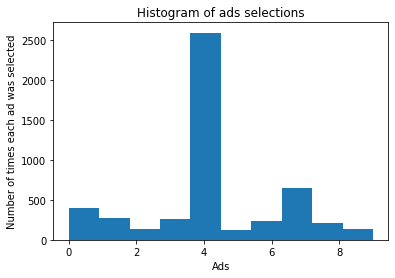

In [11]:
N = 5000 #total no. of rounds of ads to users, 10k rounds showing ads to 10k users
d = 10 #total no. of ads
ads_selected = [] 
numbers_of_selections = [0] * d         #no. of times i'th ad was selected, is a list of 10 '0s'
sums_of_rewards = [0] * d               #reward accumulated for each ad
total_reward = 0                        #sum of all rewards of all ads
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):                  #looping all ads
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) #+/- range of CI
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400                #super high value to give an unselected ad, highest UCB
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound      #update the max_UCB
      ad = i
  ads_selected.append(ad)                #start adding the ad to the initiated list.
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #no. of times that ad is selected till this round N
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward #the core of reinforcement learning, using rewards to prioritize/penalize
  total_reward = total_reward + reward


plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

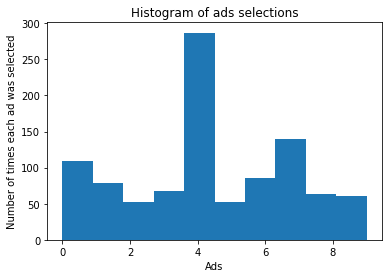

In [12]:
N = 1000 #total no. of rounds of ads to users, 10k rounds showing ads to 10k users
d = 10 #total no. of ads
ads_selected = [] 
numbers_of_selections = [0] * d         #no. of times i'th ad was selected, is a list of 10 '0s'
sums_of_rewards = [0] * d               #reward accumulated for each ad
total_reward = 0                        #sum of all rewards of all ads
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):                  #looping all ads
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) #+/- range of CI
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400                #super high value to give an unselected ad, highest UCB
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound      #update the max_UCB
      ad = i
  ads_selected.append(ad)                #start adding the ad to the initiated list.
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #no. of times that ad is selected till this round N
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward #the core of reinforcement learning, using rewards to prioritize/penalize
  total_reward = total_reward + reward


plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

So, the UCB performs impressively well even after running only for 1000 rounds. Thus, cutting ad experiment costs by 1/10th.  
Let's try going lower.

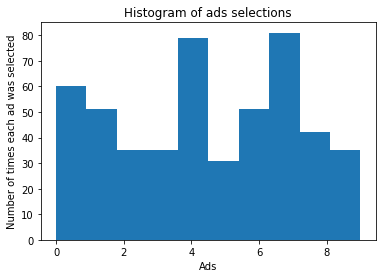

In [13]:
N = 500 #total no. of rounds of ads to users, 10k rounds showing ads to 10k users
d = 10 #total no. of ads
ads_selected = [] 
numbers_of_selections = [0] * d         #no. of times i'th ad was selected, is a list of 10 '0s'
sums_of_rewards = [0] * d               #reward accumulated for each ad
total_reward = 0                        #sum of all rewards of all ads
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):                  #looping all ads
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) #+/- range of CI
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400                #super high value to give an unselected ad, highest UCB
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound      #update the max_UCB
      ad = i
  ads_selected.append(ad)                #start adding the ad to the initiated list.
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #no. of times that ad is selected till this round N
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward #the core of reinforcement learning, using rewards to prioritize/penalize
  total_reward = total_reward + reward

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

As visible, the model performs great until 1000 rounds, but when dropped to 500, the UCB Algo isn't able to learn the best ad.  
So, that is the limitation of this model, that we will have to learn 'x' amount of rounds to get to the best ad.  
We can try other models to see if they can do the same guessing in lesser no. of rounds.  
One of these are Thomson Sampling.